## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Création des données d'entrainement

In [2]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


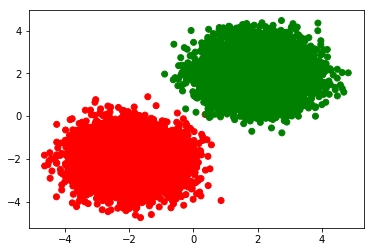

In [3]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [6]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [5]:
list(datas[0])+[labels[0]]

[-1.4813752153671809, -3.1832040629832856, 0.0]

In [7]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                   ord couleur
0        -1.4813752153671809   -3.1832040629832856     red
1        -2.0326674882377325   -1.9219109177651592     red
2         -3.191995774149136   -2.9787628470641296     red
3         -2.621456765206666   -0.8237517496961673     red
4         -2.100859696456477   -1.8347991835915354     red
5         -2.053186076051575    -2.761748047398763     red
6        -1.6741735853361046   -2.4172639799704974     red
7        -2.0995506553663636   -2.8123528053664435     red
8          -1.74725818690974   -2.4412126170954953     red
9         -2.340250201754074     -2.19304235661605     red
10       -1.5998203090916097    -2.277597742949399     red
11        -2.330385340393787     -1.48900657367392     red
12       -2.7789896212737135    -1.963177564862407     red
13        -1.642739668271629    -3.112428673666044     red
14       -2.1614599288680054    -2.681885884552321     red
15       -1.9065637071090373   -1.3445539116833638     red
16        -3.161471713916871    -2.602156655889919     red
17       -2.2236554860010025   -0.9672798098006123     red
18       -1.6746627090581403    -2.459101530228514     red
19        -2.006279599539148   -1.5963367585442414     red
20        -2.060041882699146   -2.0285681606117962     red
21        -1.860732060834797   -1.8821887275279754     red
22       -2.9437550082004083   -3.0739145484404737     red
23        -2.466556642278852   -2.4476250606814474     red
24       -2.2931139615938148   -2.1928897200681066     red
25       -1.1631999368688235    -0.768391342439368     red
26       -2.0222401283386793   -2.2092024524265135     red
27       -2.1876588751023114  -0.42132613415538955     red
28     -0.017970679956019087     -1.17488374675245     red
29       -1.8835093896138868   -3.8418703759398105     red
...                      ...                   ...     ...
19970      3.671726359813297     2.519675347639111   green
19971      3.007385272463701    2.3668111973243344   green
19972      2.290274816148399     3.065651527672025   green
19973      3.678122813283615    2.1762678223172323   green
19974     2.1918498949322887    1.8435360641235836   green
19975      1.644205279855677    1.0118816679308935   green
19976     0.8762037494129196    1.3211591262054176   green
19977     2.2531498024020515    1.2262361722479045   green
19978     2.8334317722500986    3.1761228151640744   green
19979     1.5927532024681241    2.4467511221846054   green
19980     2.6897726944893083   0.15628251617553257   green
19981     1.1379710887801198     1.952328525003824   green
19982      3.039929199643918     1.693992704115936   green
19983     1.8822024591189814     3.325140172863122   green
19984     2.0400914287558147    1.7459420531484824   green
19985     1.1354426017730448     1.029497188719692   green
19986     2.1760749244175974    0.7930039196694652   green
19987     2.5776978663688315     2.913232136103156   green
19988      2.690413144195174    1.1278282918657683   green
19989     2.2215271050990433     1.857792625631517   green
19990     1.9973071380789194    2.0029897246231805   green
19991      1.627794303806919     2.867761774923931   green
19992      2.791720685092198    2.4961739818041107   green
19993     1.6181502607075595    3.1636090441262974   green
19994     1.6929861419300614    1.2640192572794477   green
19995     3.0940241267561106    0.6632925571946955   green
19996     1.9277001838264094    1.9981734009434415   green
19997     2.7830459487922345    2.1406668896861456   green
19998     2.3245963720815954    1.3526297420162086   green
19999      2.753502218758168     3.271385468932406   green

[20000 rows x 3 columns]

## Création du modèle

In [8]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [ ]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [ ]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

## Résumé du modèle (couche de neurones)

In [ ]:
model.summary()

## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [ ]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [ ]:
labels

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [ ]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [ ]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [ ]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

In [ ]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [ ]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

In [ ]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [ ]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

In [ ]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [ ]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [ ]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [ ]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

## Résumé du modèle (couches de neurones)

In [ ]:
model.summary()

## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [ ]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [ ]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

## Le modèle est-il bien entraîné ?

In [ ]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [ ]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [ ]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

In [ ]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant